In [12]:
from osgeo import gdal
import numpy as np
import matplotlib.pyplot as plt
import rasterio
from rasterio.mask import mask
from rasterio import plot
import geojson

%matplotlib inline

# Loading tiff file 

In [2]:
rast = rasterio.open('../data/sample_dem.tiff')

In [50]:
#get CRS
rast.crs 

CRS.from_epsg(32628)

In [40]:
#get number of bands
rast.count

3

In [41]:
#get number of bounds
rast.bounds

BoundingBox(left=335085.0, bottom=8747685.0, right=604215.0, top=9016515.0)

In [42]:
#get height and width in pixel
print(rast.width)
print(rast.height)

8971
8961


In [52]:
#get complete metadata
rast.meta

{'driver': 'GTiff',
 'dtype': 'uint8',
 'nodata': None,
 'width': 8971,
 'height': 8961,
 'count': 3,
 'crs': CRS.from_epsg(32628),
 'transform': Affine(30.0, 0.0, 335085.0,
        0.0, -30.0, 9016515.0)}

In [55]:
# get desciption if any
rast.descriptions

(None, None, None)

In [43]:
#get bands in array
rast_band1 = rast.read(1)

In [44]:
rast_band1

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

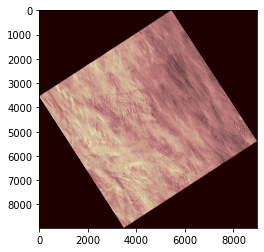

<AxesSubplot:>

In [48]:
#plot raster of different bands
rasterio.plot.show(rast_band1,cmap='pink')

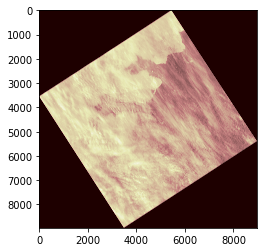

<AxesSubplot:>

In [47]:
rast_band2 = rast.read(2)
rasterio.plot.show(rast_band2,cmap='pink')

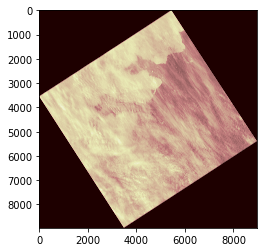

<AxesSubplot:>

In [49]:
rast_band3 = rast.read(3)
rasterio.plot.show(rast_band3,cmap='pink')

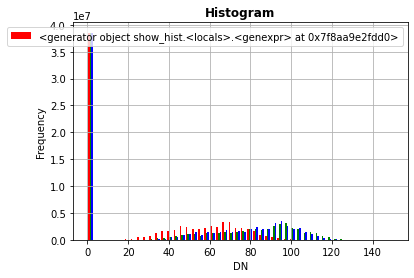

In [56]:
#get histogram
rasterio.plot.show_hist(rast,bins=50)

In [21]:
# Clip image 
clipped_raster = rast.read(1)[3000:6000,3000:6000]
# plt.imshow(clipped_raster[1,:,:])
# rasterio.plot.show(clipped_raster,cmap='pink')

In [22]:
clipped_raster

array([[63, 63, 63, ..., 34, 34, 34],
       [63, 63, 63, ..., 34, 34, 34],
       [63, 63, 63, ..., 34, 34, 34],
       ...,
       [85, 85, 83, ..., 64, 64, 64],
       [86, 85, 83, ..., 67, 67, 67],
       [86, 85, 83, ..., 68, 68, 68]], dtype=uint8)

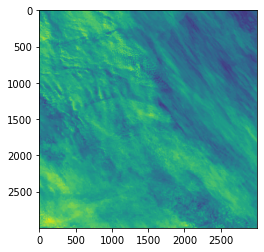

In [23]:
plt.imshow(clipped_raster)

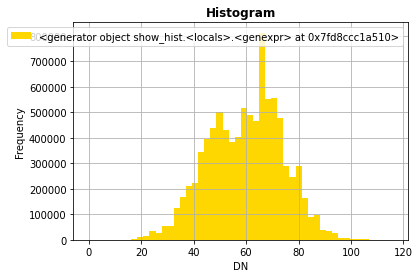

In [24]:
rasterio.plot.show_hist(clipped_raster,bins=50,histtype='stepfilled')

In [25]:
# clip based on geometery
from geojson import Polygon

In [26]:
poly = Polygon([[(500, 2500),(500, 2000),(2500, 2000),(2500, 2500),(500, 2500)]])
poly

{"coordinates": [[[500, 2500], [500, 2000], [2500, 2000], [2500, 2500], [500, 2500]]], "type": "Polygon"}

In [27]:
out_img, out_transform = mask(dataset=clipped_raster, shapes=[poly], crop=True)

AttributeError: 'numpy.ndarray' object has no attribute 'nodata'